In [1]:
import importlib
import sys
print(sys.path)
import kltools_grism_module as m
importlib.reload(m)
print(m.__version__)
print(m.__file__)
import numpy as np
import matplotlib.pyplot as plt

['/home/jiachuan/kl-tools/notebooks', '/home/jiachuan/anaconda3/envs/kltools/lib/python39.zip', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/lib-dynload', '', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages/GalSim-2.3.4-py3.9-linux-x86_64.egg', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages/kltools_grism_module-0.0.2-py3.9-linux-x86_64.egg', '/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages/IPython/extensions', '/home/jiachuan/.ipython']
0.0.2
/home/jiachuan/anaconda3/envs/kltools/lib/python3.9/site-packages/kltools_grism_module-0.0.2-py3.9-linux-x86_64.egg/kltools_grism_module.cpython-39-x86_64-linux-gnu.so


## Checking pixel weight

In [2]:
theory_cube_Nx = 34
theory_cube_Ny = 34
theory_cube_Nlam = 200
theory_cube_scale = 0.05
observed_image_Nx = 28
observed_image_Ny = 28
observed_image_scale = 0.13
R_spec = 500.0
disper_angle = 0.0
offset = 00.0
################################

Rx_obs = int(observed_image_Nx/2) - 0.5 * ((observed_image_Nx - 1) % 2);
Ry_obs = int(observed_image_Ny/2) - 0.5 * ((observed_image_Ny - 1) % 2);
Rx_theory = int(theory_cube_Nx/2) - 0.5 * ((theory_cube_Nx - 1) % 2);
Ry_theory = int(theory_cube_Ny/2) - 0.5 * ((theory_cube_Ny - 1) % 2);

extent_theory = np.array([-Rx_theory-0.5, -Rx_theory+0.5+theory_cube_Nx-1, 
                          -Ry_theory-0.5, -Ry_theory+0.5+theory_cube_Ny-1])*theory_cube_scale
extent_obs = np.array([-Rx_obs-0.5, -Rx_obs+0.5+observed_image_Nx-1, 
                       -Ry_obs-0.5, -Ry_obs+0.5+observed_image_Ny-1])*observed_image_scale
Rbin_theory = [(-Rx_theory + i)*theory_cube_scale for i in range(theory_cube_Nx)]
Rbin_obs = [(-Rx_obs + i)*observed_image_scale for i in range(observed_image_Nx)]

print("model cube extent: ", extent_theory)
print("obs image extent: ", extent_obs)
print("model cube grid: ", Rbin_theory)
print("obs img grid: ", Rbin_obs)

model cube extent:  [-0.85  0.85 -0.85  0.85]
obs image extent:  [-1.82  1.82 -1.82  1.82]
model cube grid:  [-0.8250000000000001, -0.775, -0.7250000000000001, -0.675, -0.625, -0.5750000000000001, -0.525, -0.47500000000000003, -0.42500000000000004, -0.375, -0.325, -0.275, -0.225, -0.17500000000000002, -0.125, -0.07500000000000001, -0.025, 0.025, 0.07500000000000001, 0.125, 0.17500000000000002, 0.225, 0.275, 0.325, 0.375, 0.42500000000000004, 0.47500000000000003, 0.525, 0.5750000000000001, 0.625, 0.675, 0.7250000000000001, 0.775, 0.8250000000000001]
obs img grid:  [-1.7550000000000001, -1.625, -1.495, -1.365, -1.235, -1.105, -0.9750000000000001, -0.845, -0.7150000000000001, -0.585, -0.455, -0.325, -0.195, -0.065, 0.065, 0.195, 0.325, 0.455, 0.585, 0.7150000000000001, 0.845, 0.9750000000000001, 1.105, 1.235, 1.365, 1.495, 1.625, 1.7550000000000001]


In [9]:
stat = m.init_pars(theory_cube_Nx,
theory_cube_Ny,
theory_cube_Nlam,
theory_cube_scale,
observed_image_Nx,
observed_image_Ny,
observed_image_scale,
R_spec,
disper_angle,
offset)

In [10]:
stat = m.print_Pars()

Print Pars object:
	 - theory_cube_Nx = 34
	 - theory_cube_Ny = 34
	 - theory_cube_Nlam = 200
	 - theory_cube_scale = 0.05
	 - observed_image_Nx = 28
	 - observed_image_Ny = 28
	 - observed_image_scale = 0.13
	 - R_spec = 500
	 - disper_angle = 0
	 - offset = 0


In [5]:
_theory_cube = np.ones([theory_cube_Nlam, theory_cube_Ny, theory_cube_Nx])
_lambdas = np.zeros([theory_cube_Nlam, 2])
for i in range(theory_cube_Nlam):
    _lambdas[i][0] = -100 + i*1
    _lambdas[i][1] = -100 + (i+1)*1
_bandpasses = np.ones([theory_cube_Nlam, 2])
_dispersed_data = np.zeros([observed_image_Ny, observed_image_Nx])

theory_cube = m.DBVec(_theory_cube.flatten())
lambdas = m.DBVec(_lambdas.flatten())
bandpasses = m.DBVec(_bandpasses.flatten())
dispersed_data = m.DBVec(_dispersed_data.flatten())
print(dispersed_data)
print(lambdas)

DBVec[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [11]:
%time stat = m.stack(theory_cube, lambdas, bandpasses, dispersed_data)

CPU times: user 12.9 ms, sys: 51 µs, total: 13 msRx_theory = 16.5
Init X grid (theory cube): 
-0.825 -0.775 -0.725 -0.675 -0.625 -0.575 -0.525 -0.475 -0.425 -0.375 -0.325 -0.275 -0.225 -0.175 -0.125 -0.075 -0.025 0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575 0.625 0.675 0.725 0.775 0.825 
Init Y grid (theory cube): 

Wall time: 12.5 ms
-0.825 -0.775 -0.725 -0.675 -0.625 -0.575 -0.525 -0.475 -0.425 -0.375 -0.325 -0.275 -0.225 -0.175 -0.125 -0.075 -0.025 0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575 0.625 0.675 0.725 0.775 0.825 
corner of the theory cube frame: -0.85-0.85
Rs_obs = 13.5
Init X grid (observed image): 
-1.755 -1.625 -1.495 -1.365 -1.235 -1.105 -0.975 -0.845 -0.715 -0.585 -0.455 -0.325 -0.195 -0.065 0.065 0.195 0.325 0.455 0.585 0.715 0.845 0.975 1.105 1.235 1.365 1.495 1.625 1.755 
Init Y grid (observed image): 
-1.755 -1.625 -1.495 -1.365 -1.235 -1.105 -0.975 -0.845 -0.715 -0.585 -0.455 -0.325 -0.195 -0.065 0.065 0.195 0

slice 162 shift = (62.5, 0)mean wavelength = 62.5
slice 163 shift = (63.5, 0)mean wavelength = 63.5
slice 164 shift = (64.5, 0)mean wavelength = 64.5
slice 165 shift = (65.5, 0)mean wavelength = 65.5
slice 166 shift = (66.5, 0)mean wavelength = 66.5
slice 167 shift = (67.5, 0)mean wavelength = 67.5
slice 168 shift = (68.5, 0)mean wavelength = 68.5
slice 169 shift = (69.5, 0)mean wavelength = 69.5
slice 170 shift = (70.5, 0)mean wavelength = 70.5
slice 171 shift = (71.5, 0)mean wavelength = 71.5
slice 172 shift = (72.5, 0)mean wavelength = 72.5
slice 173 shift = (73.5, 0)mean wavelength = 73.5
slice 174 shift = (74.5, 0)mean wavelength = 74.5
slice 175 shift = (75.5, 0)mean wavelength = 75.5
slice 176 shift = (76.5, 0)mean wavelength = 76.5
slice 177 shift = (77.5, 0)mean wavelength = 77.5
slice 178 shift = (78.5, 0)mean wavelength = 78.5
slice 179 shift = (79.5, 0)mean wavelength = 79.5
slice 180 shift = (80.5, 0)mean wavelength = 80.5
slice 181 shift = (81.5, 0)mean wavelength = 81.5


Pixel weight
yellow: theory grid
green: observed grid


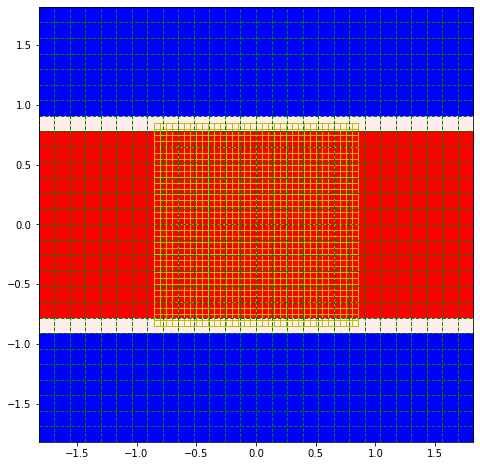

In [13]:
fig = plt.figure(figsize=(8,8))
plt.imshow(np.array(dispersed_data).reshape([observed_image_Ny, observed_image_Nx]), 
           origin='lower', extent=extent_obs, cmap='bwr')
for i in range(theory_cube_Nx+1):
    plt.plot( ((-Rx_theory+i-0.5)*theory_cube_scale, (-Rx_theory+i-0.5)*theory_cube_scale),
              (extent_theory[0], extent_theory[1]), c='y', lw=1)
for i in range(theory_cube_Ny+1):
    plt.plot( (extent_theory[2], extent_theory[3]),
             ((-Ry_theory+i-0.5)*theory_cube_scale, (-Ry_theory+i-0.5)*theory_cube_scale),
               c='y', lw=1)
#    plt.axhline((-Ry_theory+i-0.5)*theory_cube_scale, c='y', lw=1)
    
for i in range(observed_image_Nx+1):
    plt.axvline((-Rx_obs+i-0.5)*observed_image_scale, c='g', lw=1, ls='--')
for i in range(observed_image_Ny+1):
    plt.axhline((-Ry_obs+i-0.5)*observed_image_scale, c='g', lw=1, ls='--')
print("Pixel weight")
print("yellow: theory grid")
print("green: observed grid")


## Check simulated dispersion with kltools pipeline

In [ ]:
params_file = 